<a href="https://colab.research.google.com/github/justme088/lab-termodinamica/blob/main/Termodin%C3%A1mica_Proyecto_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [75]:
d1 = pd.read_csv("/content/drive/MyDrive/GoogleColab/Termo/Proyecto/8-980-1739_1.csv")
d1 = d1[d1['tempC'] != -0.01] # eliminar valores erroneos
d1 = d1.sort_values(by='ID').reset_index(drop=True) # ordenar las filas por orden de adición a la base de datos


In [82]:
def format_date(x):
  return ('-'.join(x.split()[0].split('-')[::-1]))+' '+x.split()[1]

format_date_v = np.vectorize(format_date)

In [81]:
media = d1['tempC'].mean() # media

# Calcular la desviación estándar
desviacion_estandar = d1['tempC'].std()

# Calcular el error estándar
error_estandar = desviacion_estandar / (len(d1) ** 0.5)

# Calcular el margen de error en porcentaje
margen_error_porcentaje = (error_estandar / media) * 100

# Imprimir resultados
print("Media:", media, 'ºC')
print("Desviación Estándar:", desviacion_estandar, 'ºC')
print("Error Estándar:", error_estandar, 'ºC')
print("Margen de Error (%):", margen_error_porcentaje, '%')

Media: 29.90401013874066 ºC
Desviación Estándar: 2.1647234093504695 ºC
Error Estándar: 0.0250027411490548 ºC
Margen de Error (%): 0.08360999422169048 %


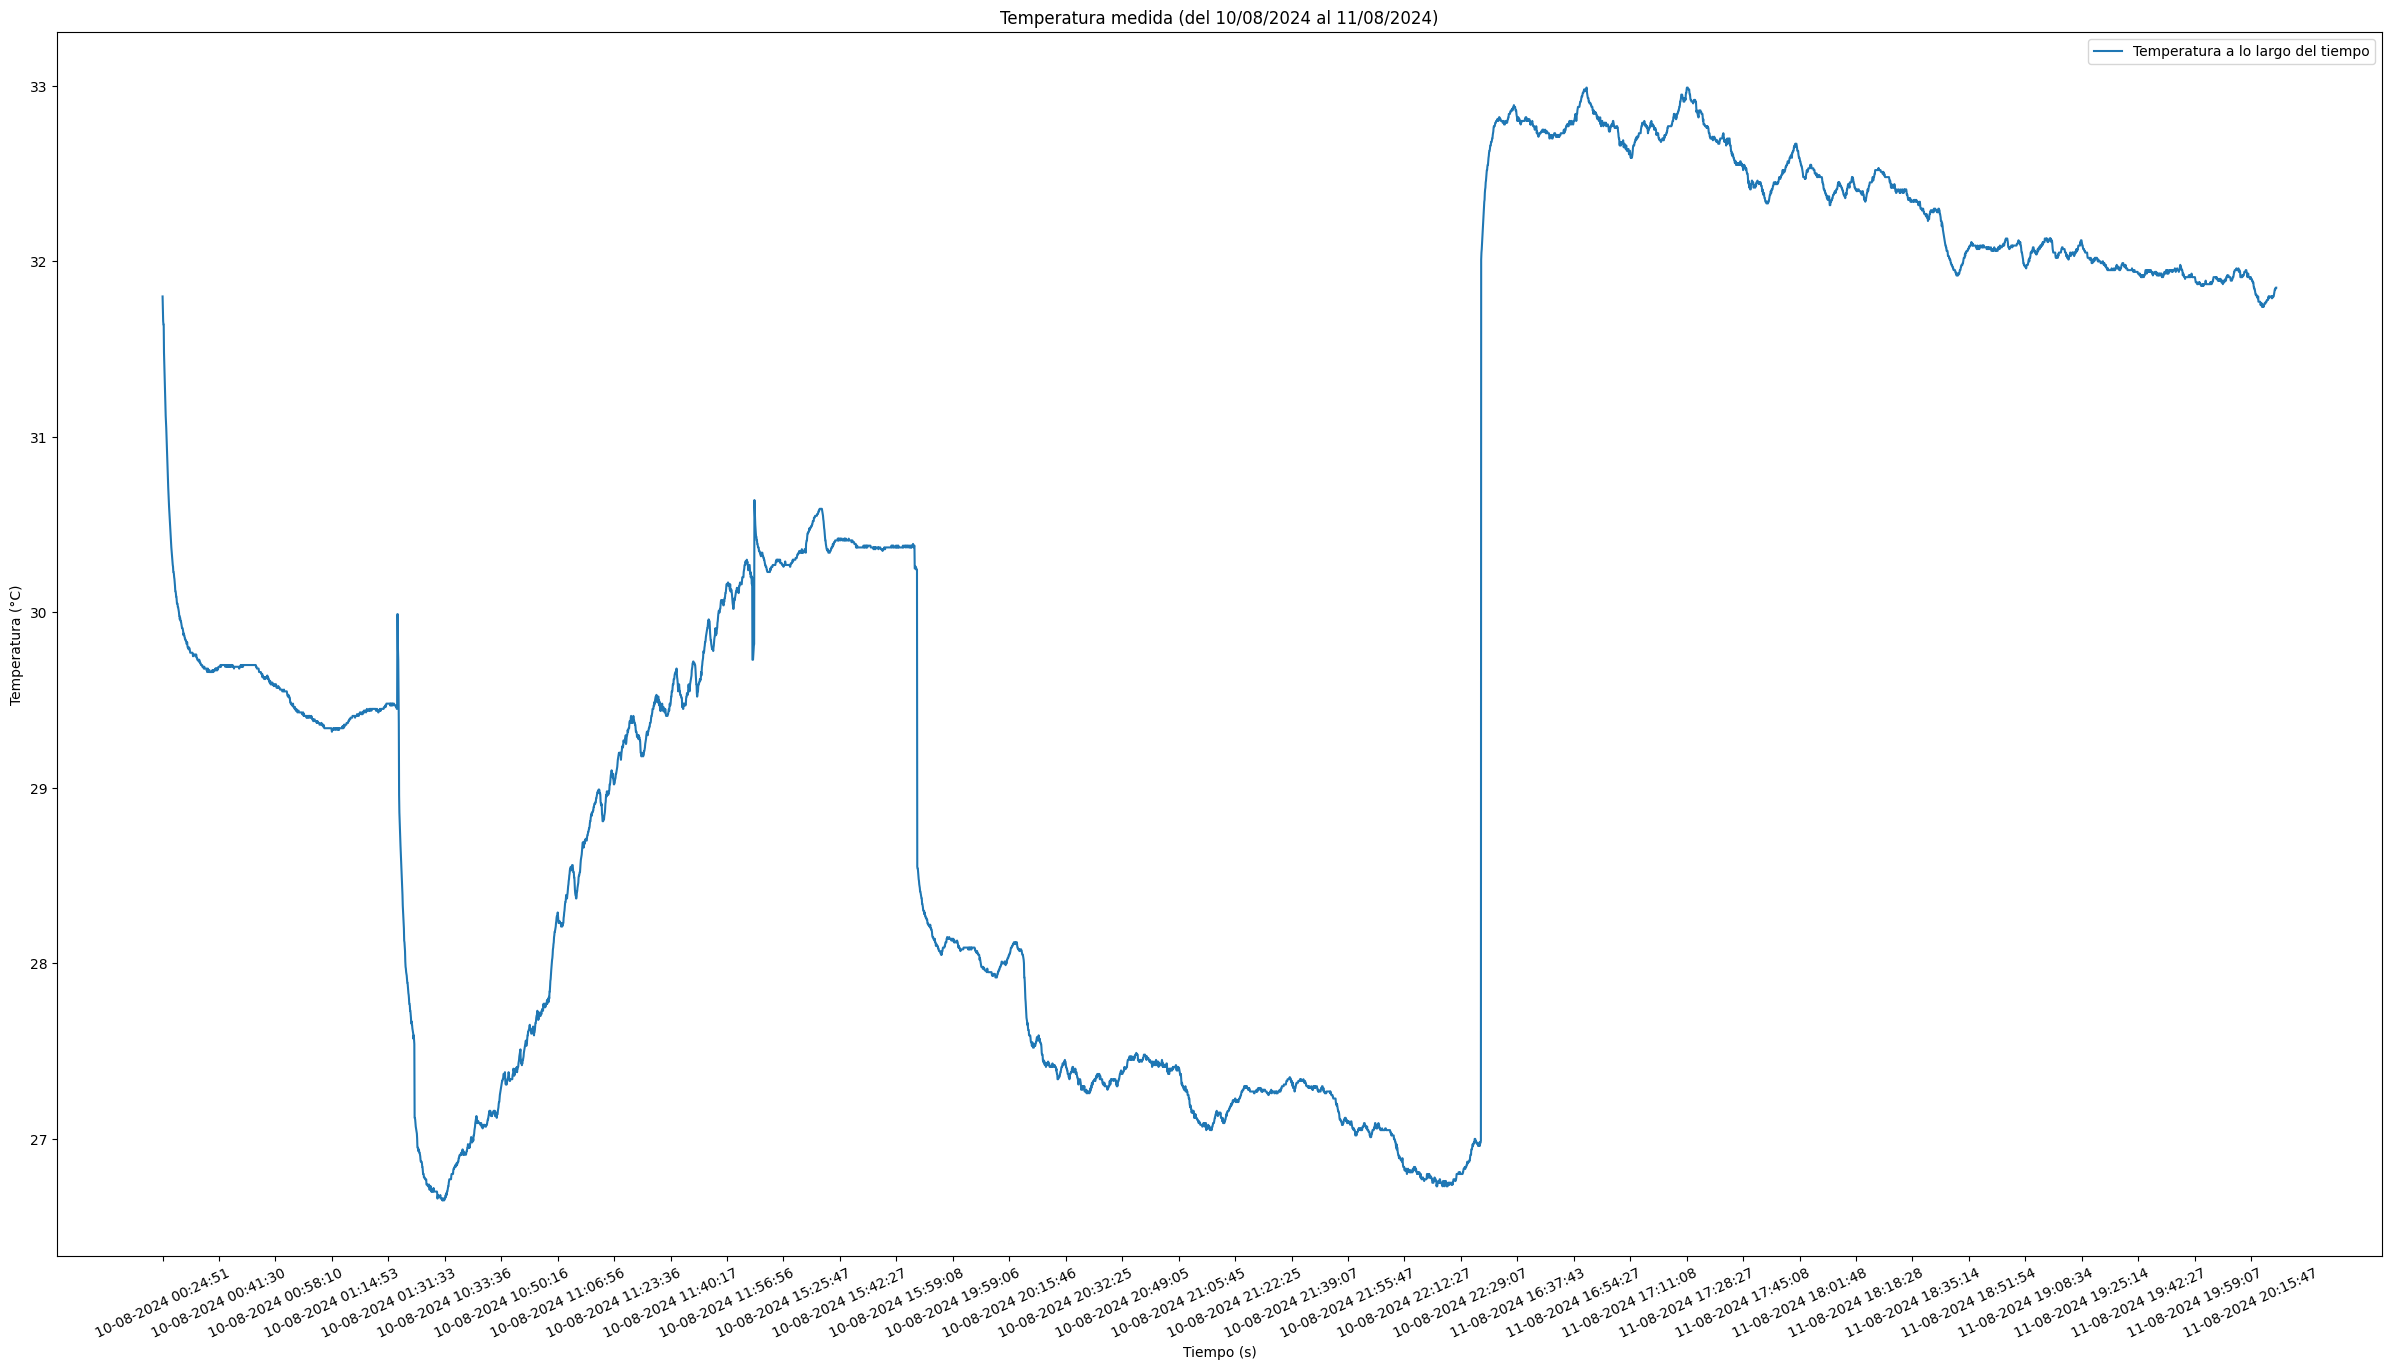

In [84]:
plt.figure(figsize=(30, 18))
plt.subplots_adjust(bottom=0.2)

d1['finsert'] = format_date_v(d1['finsert'])

# Mostrar solo uno de cada n valores en el eje X
step = 200
plt.xticks(ticks=range(0, len(d1['finsert']), step),
           labels=[d1['finsert'][i] for i in range(0, len(d1['finsert']), step)],
           rotation=25)

# Graficar los datos
plt.plot(d1['finsert'], d1['tempC'], label='Temperatura a lo largo del tiempo')

# Configurar etiquetas y título
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura medida (del 10/08/2024 al 11/08/2024)')
plt.legend()

# Mostrar el gráfico
plt.show()